## Lab 4

# import libs and connect to databases

In [28]:
import pandas
import configparser
import psycopg2

In [29]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [30]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [31]:
cur=conn.cursor()

# Question 1

In [34]:
sql_q1 = """
            select * from student
            """

In [35]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,tarbelce@dukes.jmu.edu,Chloe Tarbel,IA
1,mcdaniva@dukes.jmu.edu,Virginia McDaniel,IA
2,maysah@dukes.jmu.edu,Lexi Mays,IA
3,levinefm@dukes.jmu.edu,Fiorella Levine,IA
4,student1@dukes.jmu.edu,student 1,GS
5,student2@dukes.jmu.edu,student 2,ISAT
6,student3@dukes.jmu.edu,student 3,ISAT
7,student4@dukes.jmu.edu,student 4,GS
8,student5@dukes.jmu.edu,student 5,IA
9,student6@dukes.jmu.edu,student 6,CS


# Question 2

In [38]:
sql_q2 = """
        select professor.p_name,
        course.c_name
        from professor
        inner join course
        on professor.p_email = course.p_email
        
        """

In [39]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Orlandrew Danzell,Introduction to National Security Intelligence...
1,Timothy Walton,Hypotheses Testing ...
2,Ron Raab,Homeland Security ...
3,new_p,Technology Applications in a Networked World ...
4,new_p,Hacking for Diplomacy ...
5,new_p,new_c_name ...


# Question 3

In [40]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from enroll_list
        group by c_number
        order by enrolled desc
        """

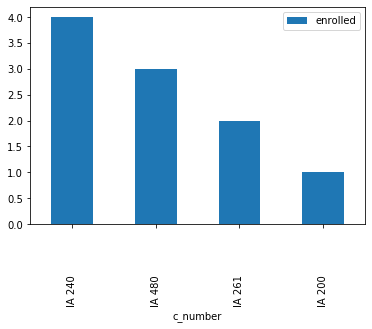

In [41]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

# Question 4

In [42]:
sql_q4 = """
        select professor.p_name,
        count(course.c_name) as teaching_number
        from professor
        inner join course
        on professor.p_email = course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

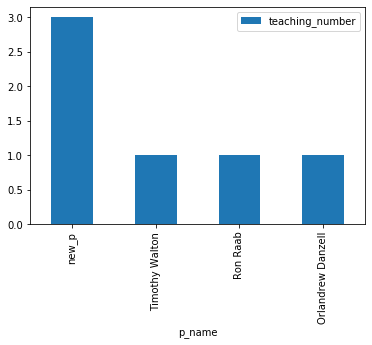

In [43]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# Question 5

In [67]:
sql_q5_professor = """
                    insert into professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_profes@jmu.edu','new_p','new_office')

In [68]:
cur.execute(sql_q5_professor)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [69]:
conn.commit()

In [70]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,danzelox@jmu.edu ...,Orlandrew Danzell,N/a
1,marrinsp@jmu.edu ...,Stephen Marrin,ENGEO 2104
2,raabrw@jmu.edu ...,Ron Raab,ISAT 156
3,waltontr@jmu.edu ...,Timothy Walton,ISAT 326
4,new_p@jmu.edu ...,new_p,new_office


In [71]:
sql_q5_course = """
                    insert into course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [73]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [74]:
conn.commit()

In [75]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA 200,Introduction to National Security Intelligence...,Fest1022,danzelox@jmu.edu ...
1,IA 261,Hypotheses Testing ...,ENGEO2201,waltontr@jmu.edu ...
2,IA 480,Homeland Security ...,ENGEO1301,raabrw@jmu.edu ...
3,IA 240,Technology Applications in a Networked World ...,Online,new_p@jmu.edu ...
4,IA 400,Hacking for Diplomacy ...,Online,new_p@jmu.edu ...
5,ia_new,new_c_name ...,online,new_p@jmu.edu ...


# Question 6

In [76]:
sql_q6_course = """
                update course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [77]:
cur.execute(sql_q6_course)

In [78]:
conn.commit()

In [79]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA 200,Introduction to National Security Intelligence...,Fest1022,danzelox@jmu.edu ...
1,IA 261,Hypotheses Testing ...,ENGEO2201,waltontr@jmu.edu ...
2,IA 480,Homeland Security ...,ENGEO1301,raabrw@jmu.edu ...
3,IA 240,Technology Applications in a Networked World ...,Online,new_p@jmu.edu ...
4,IA 400,Hacking for Diplomacy ...,Online,new_p@jmu.edu ...
5,ia_new,new_c_name ...,online,new_p@jmu.edu ...


In [80]:
sql_q6_professor = """
                delete from professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [81]:
cur.execute(sql_q6_professor)

In [82]:
conn.commit()

In [84]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,danzelox@jmu.edu ...,Orlandrew Danzell,N/a
1,marrinsp@jmu.edu ...,Stephen Marrin,ENGEO 2104
2,raabrw@jmu.edu ...,Ron Raab,ISAT 156
3,waltontr@jmu.edu ...,Timothy Walton,ISAT 326
4,new_p@jmu.edu ...,new_p,new_office


# Close Connection

In [85]:
cur.close()
conn.close()